In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('C:/Ahmadifar/Files/Data Science Course/Python/2nd Session/Assignement-02/HR Analytics Exercise/HR.csv')

# Number of employees hired based on salary levels.

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

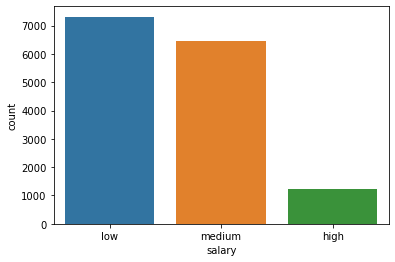

In [4]:
sns.countplot(x = "salary", data = data)
data.loc[:, 'salary'].value_counts()

# The number of employees hired in each department.

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

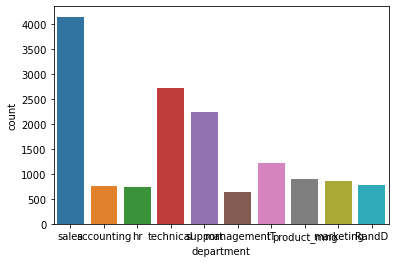

In [5]:
sns.countplot(x = "department", data = data)
data.loc[:, 'department'].value_counts()

# The number of hired individuals based on salary level and department type.  

In [33]:
pd.crosstab(data.salary, data.department)

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


# The highest number of projects with personnel turnover based on satisfaction levels.

In [11]:
data_new= data['number_project'].max()
data['satisfaction_level'][data['number_project'] == data_new]

2        0.11
43       0.10
54       0.10
56       0.11
61       0.11
         ... 
14899    0.10
14908    0.10
14929    0.10
14933    0.10
14975    0.10
Name: satisfaction_level, Length: 256, dtype: float64

# The most influential factor on the target variable based on correlation analysis

In [17]:
corr = data.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [12]:
data_corr=data.corr()['left'][:-1]
feature_list=data_corr[data_corr>0.1].sort_values(ascending=False)
feature_list

left                  1.000000
time_spend_company    0.144822
Name: left, dtype: float64

# nalysis of the personnel turnover scatter plot based on department type and average tenure in the organization 

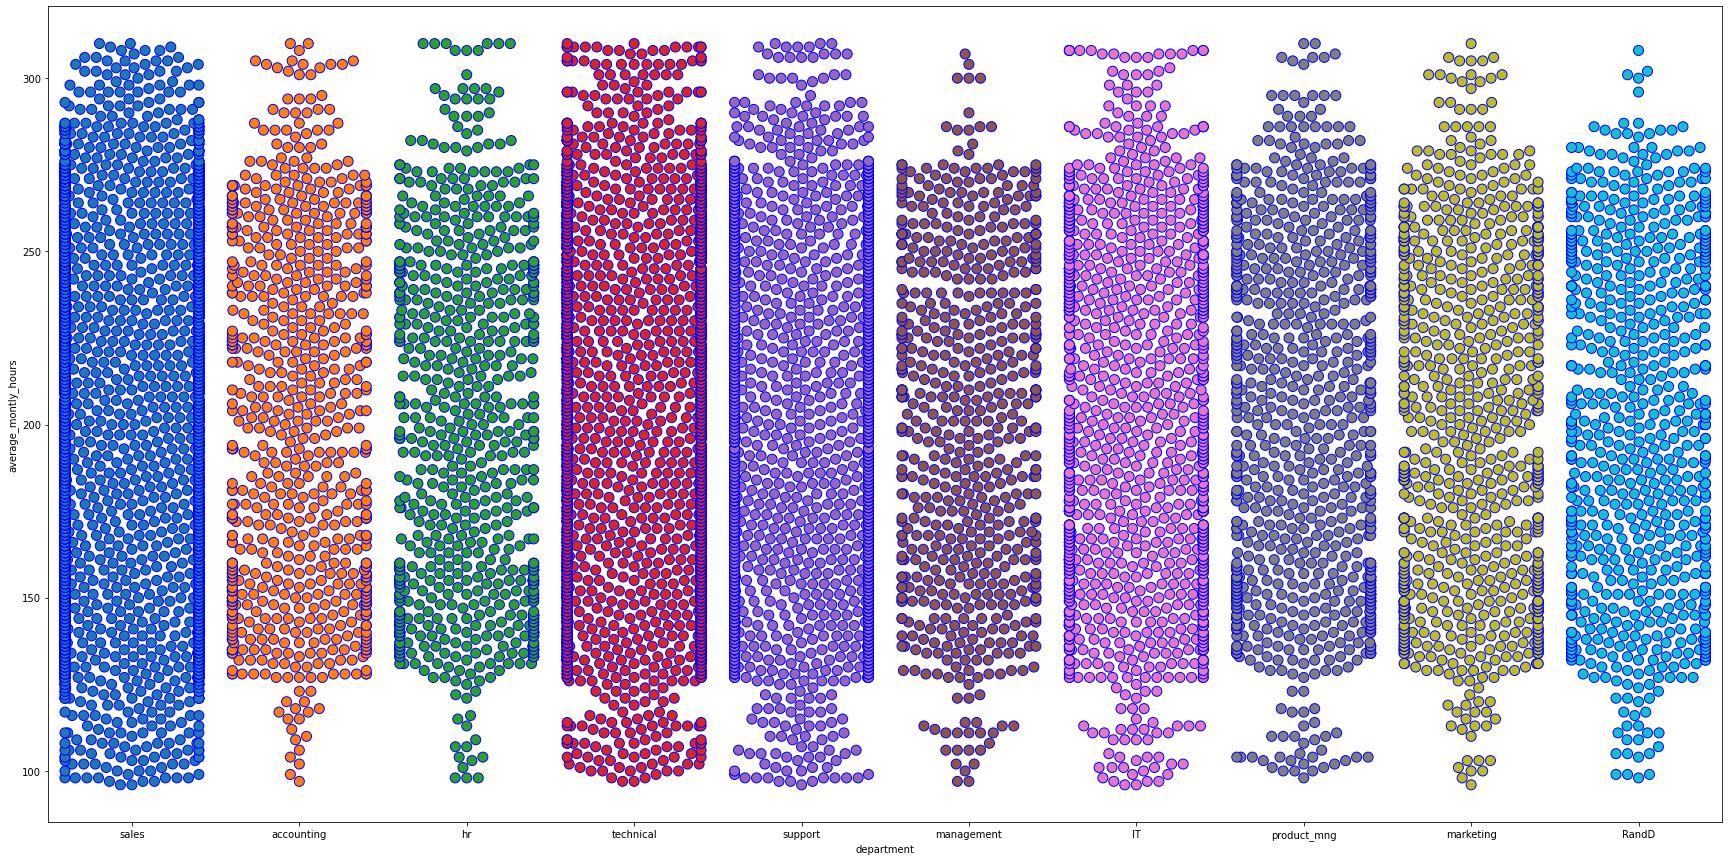

In [14]:
plt.figure(figsize=(30,15),facecolor =  "w" )
sns.swarmplot(x=data['department'], y=data['average_montly_hours'],  size = 10, linewidth=1., edgecolor='blue')

# A box plot of all departments showing employee turnover and average time spent in the organization in one frame.

Text(0.5, 1.0, 'Relation of average monthly hours withleft')

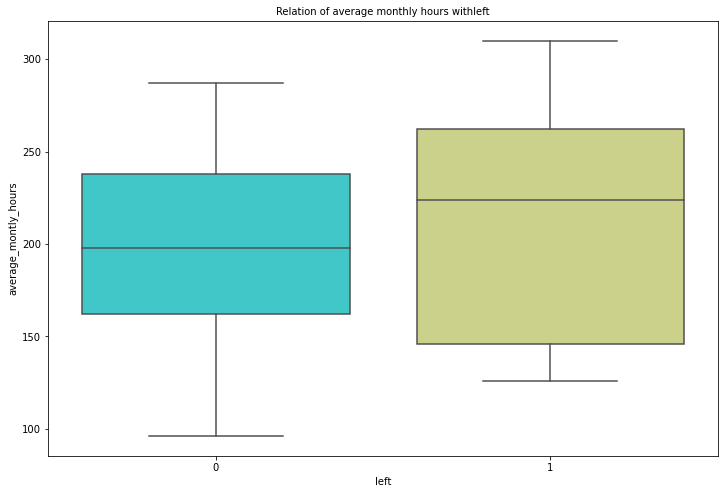

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data['left'], data['average_montly_hours'], palette = 'rainbow')
plt.title('Relation of average monthly hours withleft', fontsize = 10)

In [ ]:
g = sns.catplot(x="department", y="average_montly_hours",
                hue="left", col="average_montly_hours",
                data=data, kind="box",
                height=4, aspect=.7)

# Compare the histograms of the latest evaluation status of personnel who experienced turnover and those who will remain active in the company in a single format

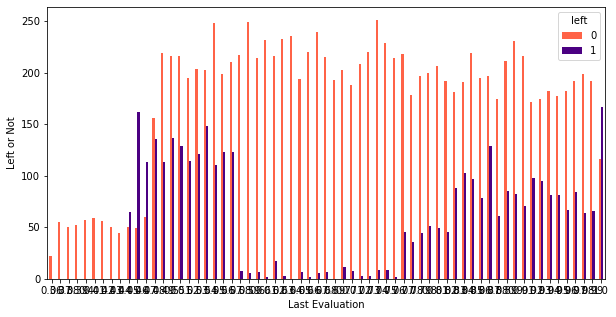

In [11]:
pd.crosstab(data.last_evaluation,data.left).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Last Evaluation')
plt.xticks(rotation = 0)
plt.ylabel('Left or Not')
plt.show()

0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64

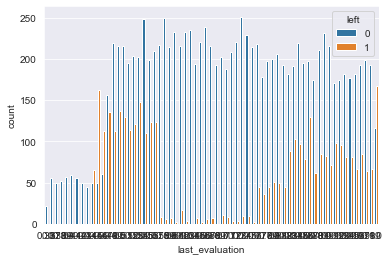

In [35]:
sns.countplot(x = "last_evaluation", data = data, hue="left")
data.loc[:, 'last_evaluation'].value_counts()

# Comparison of the histogram of employee satisfaction between those who are leaving and those who will remain active in the company. 

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.12     30
0.26     30
Name: satisfaction_level, Length: 92, dtype: int64

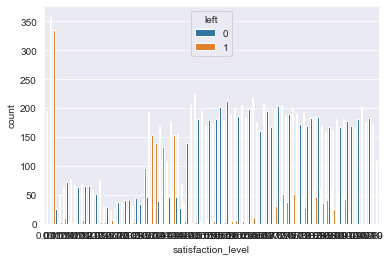

In [37]:
sns.countplot(x = "satisfaction_level", data = data, hue="left")
data.loc[:, 'satisfaction_level'].value_counts()

# Plotting a graph of the number of individuals employed in each department of the dataset based on income  

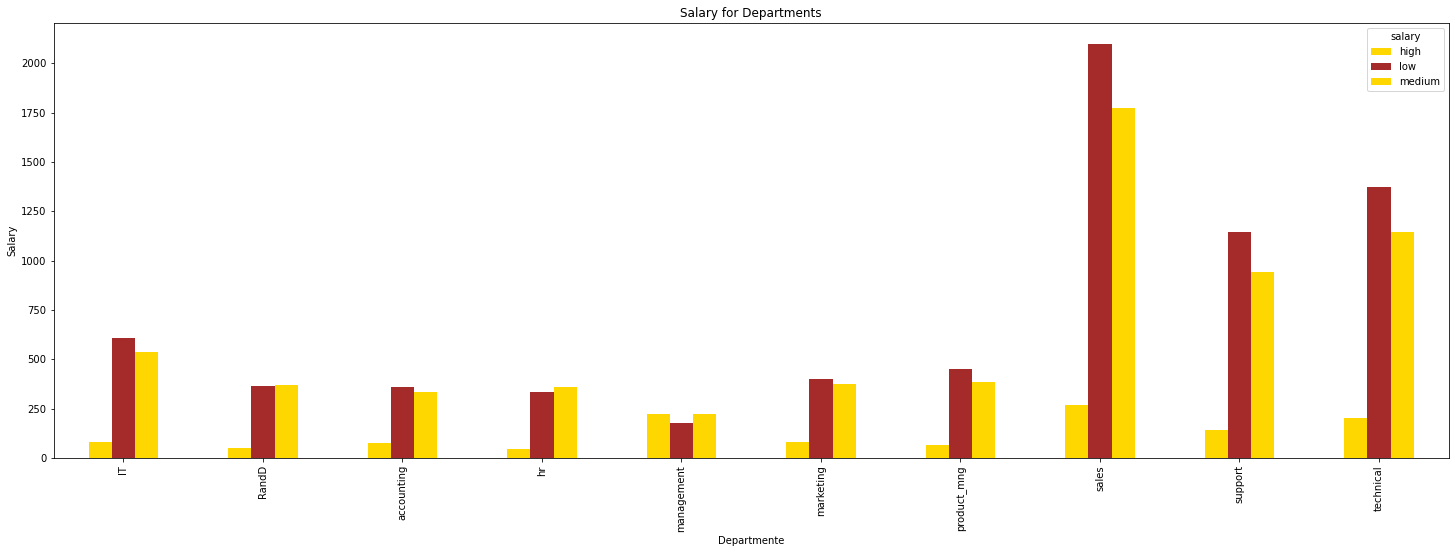

In [8]:
pd.crosstab(data.department,data.salary).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])

plt.title('Salary for Departments')
plt.xlabel('Departmente')
plt.ylabel('Salary')
plt.show()